<a href="https://colab.research.google.com/github/iryna-savchuk/CI4O_project/blob/master/result_analysis(additional).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the Results

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Loading data from output file and preprocessing it

In [2]:
# Loading output of GA algorithms from file
file_path = "output/total_runs.csv"

results_df = pd.read_csv(file_path)
results_df.head(3)

,run_number,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,best_fitness_lst
0,1,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.520966649055481, 0.8256333470344543, 0.8726..."
1,2,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.6210333108901978, 0.7003833055496216, 0.711..."
2,3,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.8732666373252869, 0.8732666373252869, 0.888..."


In [3]:
# Filling NaN values for 'torun_size' with "n/a" (will be useful for further grouping)
results_df = results_df.fillna({'tourn_size': 'n/a'})

# Convert string representation of arrays to actual arrays
results_df['best_fitness_lst'] = results_df['best_fitness_lst'].str.strip('[]').str.split(',').apply(lambda x: [float(val) for val in x])

## Calculating ABF

In [4]:
############## CALCULATING ABF ##############

# Grouping runs of a certain configuration
configuration_columns = ["total_runs", "pop_size", "gens", "select", "crossover", "mutate", 
                         "xo_prob", "mut_prob", "tourn_size"]

# Group by the specified columns and calculate the mean values of arrays
grouped_ave = results_df.groupby(configuration_columns)['best_fitness_lst'].apply(lambda x: np.mean(x.tolist(), axis=0))

# Reset the index to convert the resulting Series back to a DataFrame
result = grouped_ave.reset_index()
result = result.rename(columns={'best_fitness_lst': 'ABF'})

result.head(3)

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF
0,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.1,n/a,"[0.5314399987459183, 0.6037333369255066, 0.648..."
1,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.3,n/a,"[0.7234149992465972, 0.7786816656589508, 0.784..."
2,10,20,20,fps,arithmetic_xo,inversion_mutation,0.9,0.1,n/a,"[0.6749316692352295, 0.7374099999666214, 0.763..."


## Calculating Srandard Deviations

In [5]:
############## CALCULATING Srandard Deviations ##############

# Group by the specified columns and calculate the mean values of arrays
grouped_std = results_df.groupby(configuration_columns)['best_fitness_lst'].apply(lambda x: np.std(x.tolist(), axis=0))

# Reset the index to convert the resulting Series back to a DataFrame
result_std = grouped_std.reset_index()
result_std = result_std.rename(columns={'best_fitness_lst': 'std'})

# Merge result_std to result:
merged_df = pd.merge(result, result_std, on=configuration_columns, how='inner')
merged_df.head(3)

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF,std
0,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.1,n/a,"[0.5314399987459183, 0.6037333369255066, 0.648...","[0.12389307381299128, 0.13062743600719084, 0.1..."
1,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.3,n/a,"[0.7234149992465972, 0.7786816656589508, 0.784...","[0.1464286587673152, 0.1502183369527777, 0.147..."
2,10,20,20,fps,arithmetic_xo,inversion_mutation,0.9,0.1,n/a,"[0.6749316692352295, 0.7374099999666214, 0.763...","[0.16026291236956597, 0.15929115809145664, 0.1..."


In [6]:
# Splitting ABF into 20 new columns corresponding to 20 generations
new_cols = pd.DataFrame(merged_df['ABF'].apply(pd.Series).values.tolist(), 
                        columns=['Gen'+str(i+1) for i in range(20)])

# Concatenate the new columns to merged_df
merged_df = pd.concat([merged_df, new_cols], axis=1)
merged_df.head(3)

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF,...,Gen11,Gen12,Gen13,Gen14,Gen15,Gen16,Gen17,Gen18,Gen19,Gen20
0,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.1,n/a,"[0.5314399987459183, 0.6037333369255066, 0.648...",...,0.743832,0.743832,0.748338,0.759932,0.761863,0.764922,0.765192,0.767358,0.779217,0.788570
1,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.3,n/a,"[0.7234149992465972, 0.7786816656589508, 0.784...",...,0.911882,0.916825,0.918995,0.920475,0.933418,0.935778,0.937562,0.948233,0.953118,0.958363
2,10,20,20,fps,arithmetic_xo,inversion_mutation,0.9,0.1,n/a,"[0.6749316692352295, 0.7374099999666214, 0.763...",...,0.852200,0.856785,0.856785,0.862297,0.882768,0.895658,0.896907,0.899138,0.907612,0.908160


## Comparing "Typical" Best Fitness on 20th Generation

In [11]:
# Splitting data by selection method
data_tourn_sel_2 = merged_df[(merged_df['select']=='tournament_sel')&(merged_df['tourn_size']==2)]
data_tourn_sel_4 = merged_df[(merged_df['select']=='tournament_sel')&(merged_df['tourn_size']==4)]
data_fps_sel = merged_df[merged_df['select']=='fps']

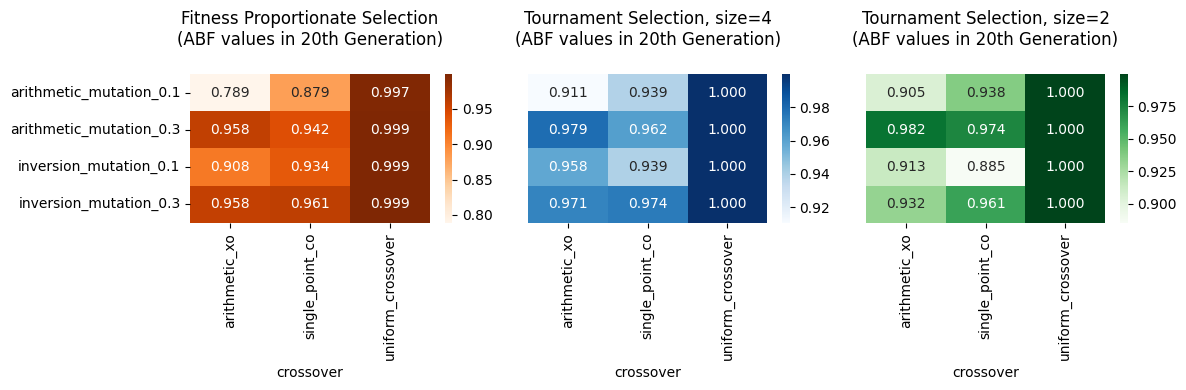

In [13]:
def plot_heatmap_ABF_Gen20(df, title, cmap, hide_yticks = False):
    # Combine 'crossover' and 'tourn_size' columns into a new column
    merged_df['mutate_and_probability'] = merged_df['mutate'].astype('string') + '_' + merged_df['mut_prob'].astype('string')
    # Reshape the data 
    heatmap_data = df.pivot_table(values='Gen20', 
                                  index='mutate_and_probability', 
                                  columns='crossover')

    # Create and display a heatmap 
    sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt='.3f')
    plt.xlabel('crossover')
    plt.ylabel('')
    plt.xticks(rotation=90)
    if hide_yticks:
      plt.yticks([])
    plt.title(title)
    return plt


# Create a figure with 3 subplots in a 1x3 grid
fig = plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 3, 1)
plot_heatmap_ABF_Gen20(data_fps_sel, 
                       "Fitness Proportionate Selection\n(ABF values in 20th Generation)\n", 
                       "Oranges",
                       hide_yticks=False)

ax2 = plt.subplot(1, 3, 2)
plot_heatmap_ABF_Gen20(data_tourn_sel_4, 
                       "Tournament Selection, size=4\n(ABF values in 20th Generation)\n", 
                       "Blues", 
                        hide_yticks = True)

ax3 = plt.subplot(1, 3, 3)
plot_heatmap_ABF_Gen20(data_tourn_sel_2, 
                       "Tournament Selection, size=2\n(ABF values in 20th Generation)\n", 
                       "Greens", 
                       hide_yticks = True)

plt.tight_layout()
plt.show()

## Visualizing Results for Different GA Configurations

In [14]:
def draw_lineplots(df, title, colormap = plt.get_cmap('tab20', 40)):
  fig, ax = plt.subplots()

  for index, row in df.iterrows():
      ax.plot(row['ABF'], 
              label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]}, mut_prob: {row["mut_prob"]})',
              color=colormap(index % colormap.N))  # Assign a color from the colormap to each line plot
      plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
  ax.set_ylim([0.5, 1])
  ax.set_xlabel('Generations')
  ax.set_ylabel('ABF')
  ax.set_title(title)
  ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

  plt.show()

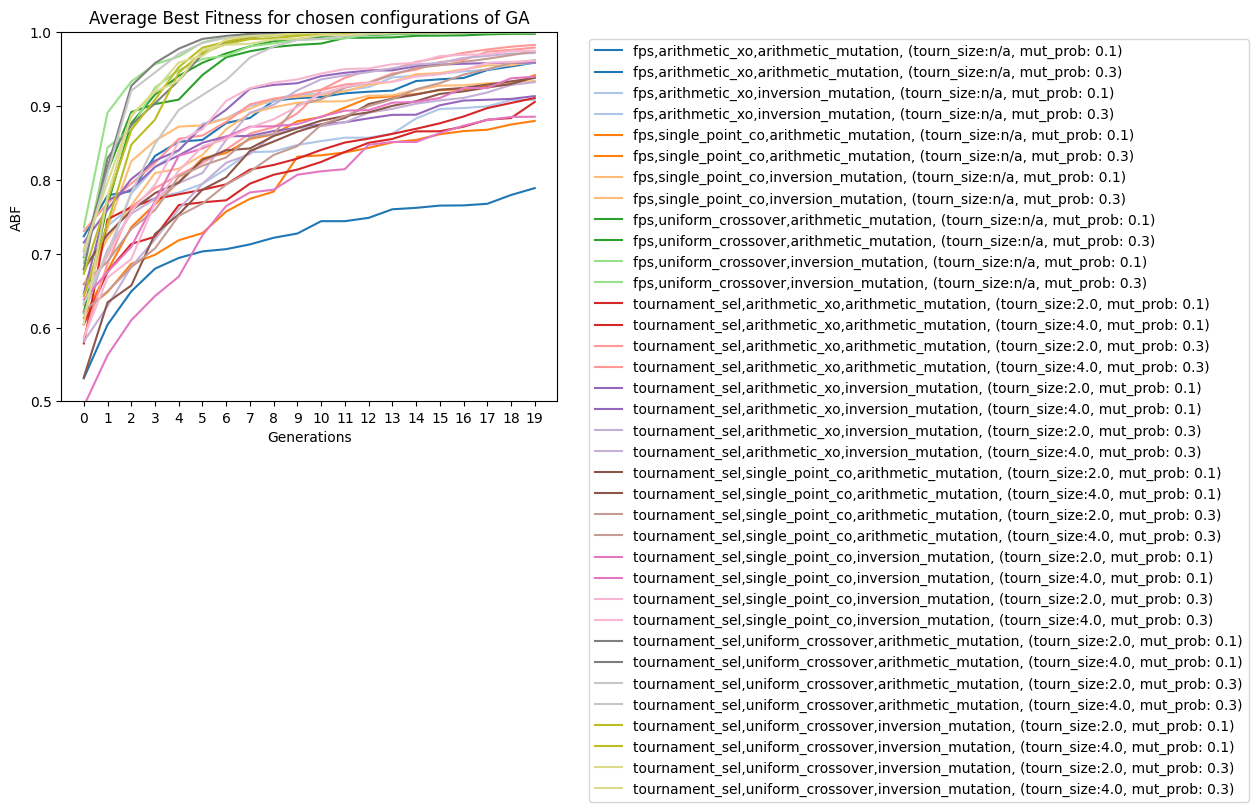

In [15]:
draw_lineplots(merged_df, title = 'Average Best Fitness for chosen configurations of GA')

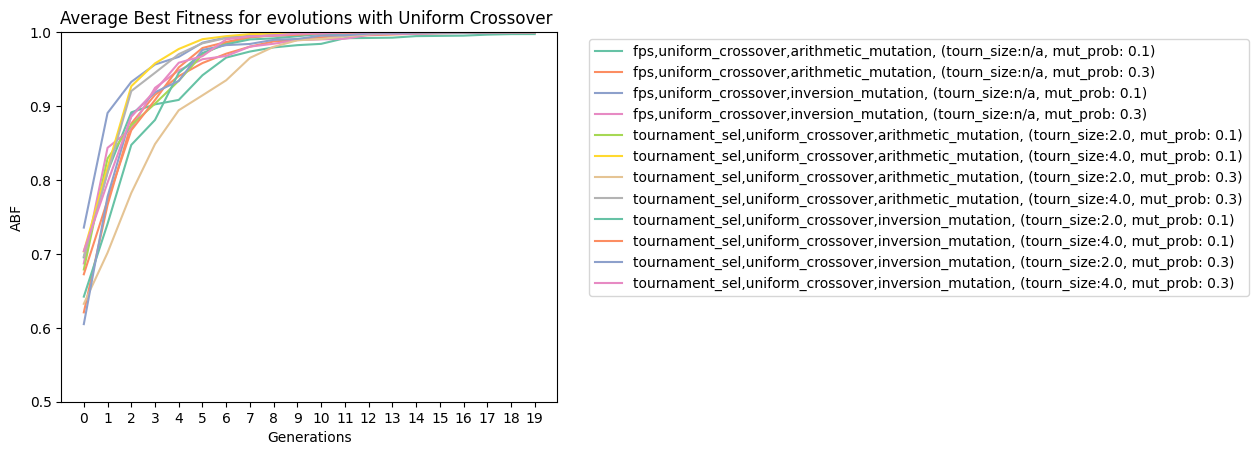

In [18]:
draw_lineplots(merged_df[merged_df['crossover']=='uniform_crossover'],
               title='Average Best Fitness for evolutions with Uniform Crossover ',
               colormap=plt.get_cmap('Set2'))

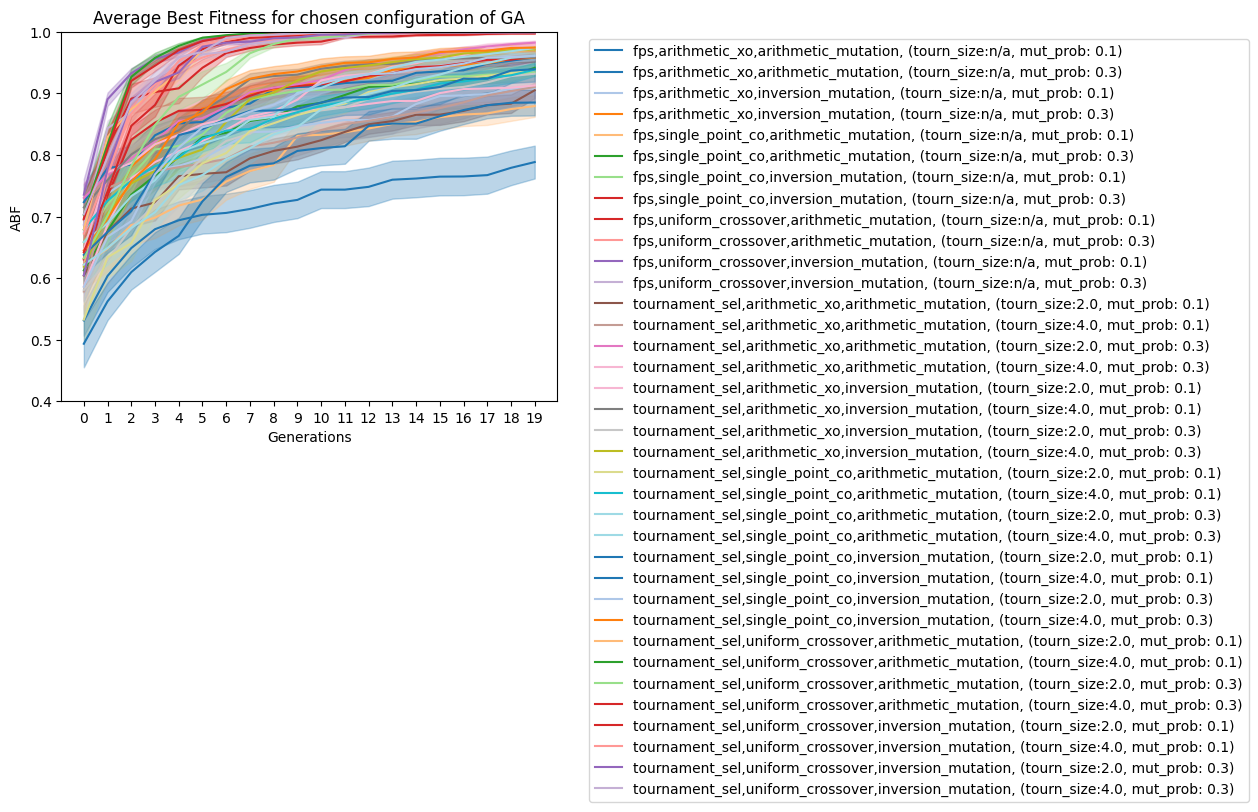

In [19]:
fig, ax = plt.subplots()

colormap = plt.get_cmap('tab20', 24)

for index, row in merged_df.iterrows():
    upper_bound = row['ABF'] + 0.2*row['std']    #!!!! needs to be changed: ideally, no 0.2
    lower_bound = row['ABF'] - 0.2*row['std']    #!!!! needs to be changed: ideally, no 0.2

    ax.plot(row['ABF'], 
            label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]}, mut_prob: {row["mut_prob"]})',
            color=colormap(index % colormap.N))  # Assign a color from the colormap to each line plot
    ax.fill_between(range(len(row['ABF'])),lower_bound, upper_bound, alpha=0.3,
                    color=colormap(index % colormap.N))
    plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))

ax.set_xlabel('Generations')
ax.set_ylabel('ABF')
ax.set_ylim([0.4, 1])
ax.set_title('Average Best Fitness for chosen configuration of GA')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [20]:
# To transform the dataframe into a new configuration:
merged_df['tourn_size'] = merged_df['tourn_size'].astype('string')
merged_df['xo_prob'] = merged_df['xo_prob'].astype('string')
merged_df['mut_prob'] = merged_df['mut_prob'].astype('string')

In [21]:
# Combine 'selection', 'crossover', 'mutate', 'xo_prob', 'mut_prob' and 'tourn_size' into one column
merged_df['combined'] = merged_df['select'] + merged_df['crossover'] + merged_df['mutate'] + merged_df['xo_prob'] + merged_df['mut_prob'] + merged_df['tourn_size']

# Initialize the new DataFrame
new_df = pd.DataFrame()

# For each unique combination, create a new column in the new DataFrame
for combo in merged_df['combined'].unique():
    # Get the 'ABF' values for this combination, reset the index, and drop the old index
    temp_df = merged_df.loc[merged_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
    # Transpose the DataFrame so each value in 'ABF' becomes a separate row
    temp_df = temp_df.T
    # Add this DataFrame to the new DataFrame, using the combo as the column name
    new_df[combo] = temp_df[0]


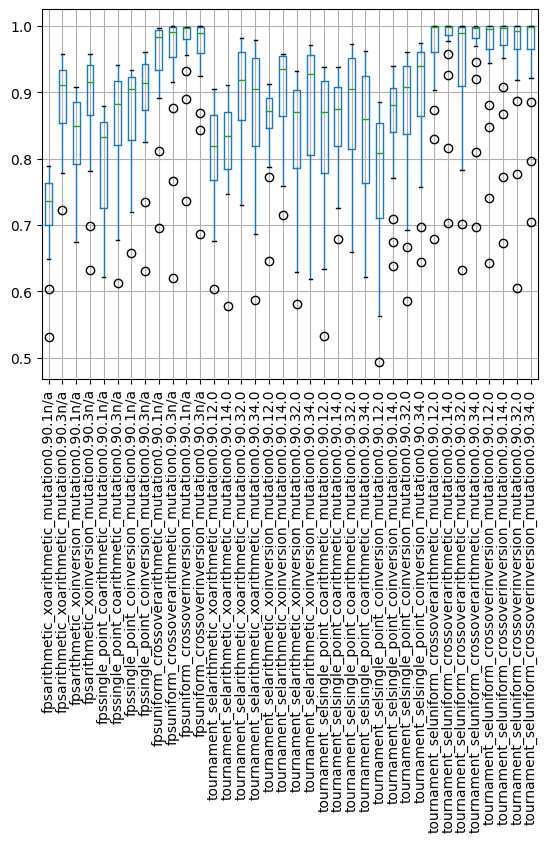

In [ ]:
new_df.boxplot()
plt.xticks(rotation='vertical')
plt.show()

## Comparison of Parameters

In [22]:
merged_df.head()

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF,...,Gen13,Gen14,Gen15,Gen16,Gen17,Gen18,Gen19,Gen20,mutate_and_probability,combined
0,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.1,n/a,"[0.5314399987459183, 0.6037333369255066, 0.648...",...,0.748338,0.759932,0.761863,0.764922,0.765192,0.767358,0.779217,0.788570,arithmetic_mutation_0.1,fpsarithmetic_xoarithmetic_mutation0.90.1n/a
1,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.3,n/a,"[0.7234149992465972, 0.7786816656589508, 0.784...",...,0.918995,0.920475,0.933418,0.935778,0.937562,0.948233,0.953118,0.958363,arithmetic_mutation_0.3,fpsarithmetic_xoarithmetic_mutation0.90.3n/a
2,10,20,20,fps,arithmetic_xo,inversion_mutation,0.9,0.1,n/a,"[0.6749316692352295, 0.7374099999666214, 0.763...",...,0.856785,0.862297,0.882768,0.895658,0.896907,0.899138,0.907612,0.908160,inversion_mutation_0.1,fpsarithmetic_xoinversion_mutation0.90.1n/a
3,10,20,20,fps,arithmetic_xo,inversion_mutation,0.9,0.3,n/a,"[0.6325333267450333, 0.6985766589641571, 0.781...",...,0.925217,0.938288,0.940782,0.943332,0.946457,0.948850,0.955825,0.957982,inversion_mutation_0.3,fpsarithmetic_xoinversion_mutation0.90.3n/a
4,10,20,20,fps,single_point_co,arithmetic_mutation,0.9,0.1,n/a,"[0.6217366680502892, 0.6479533404111862, 0.686...",...,0.842990,0.850523,0.853725,0.861413,0.865738,0.867522,0.874590,0.879480,arithmetic_mutation_0.1,fpssingle_point_coarithmetic_mutation0.90.1n/a


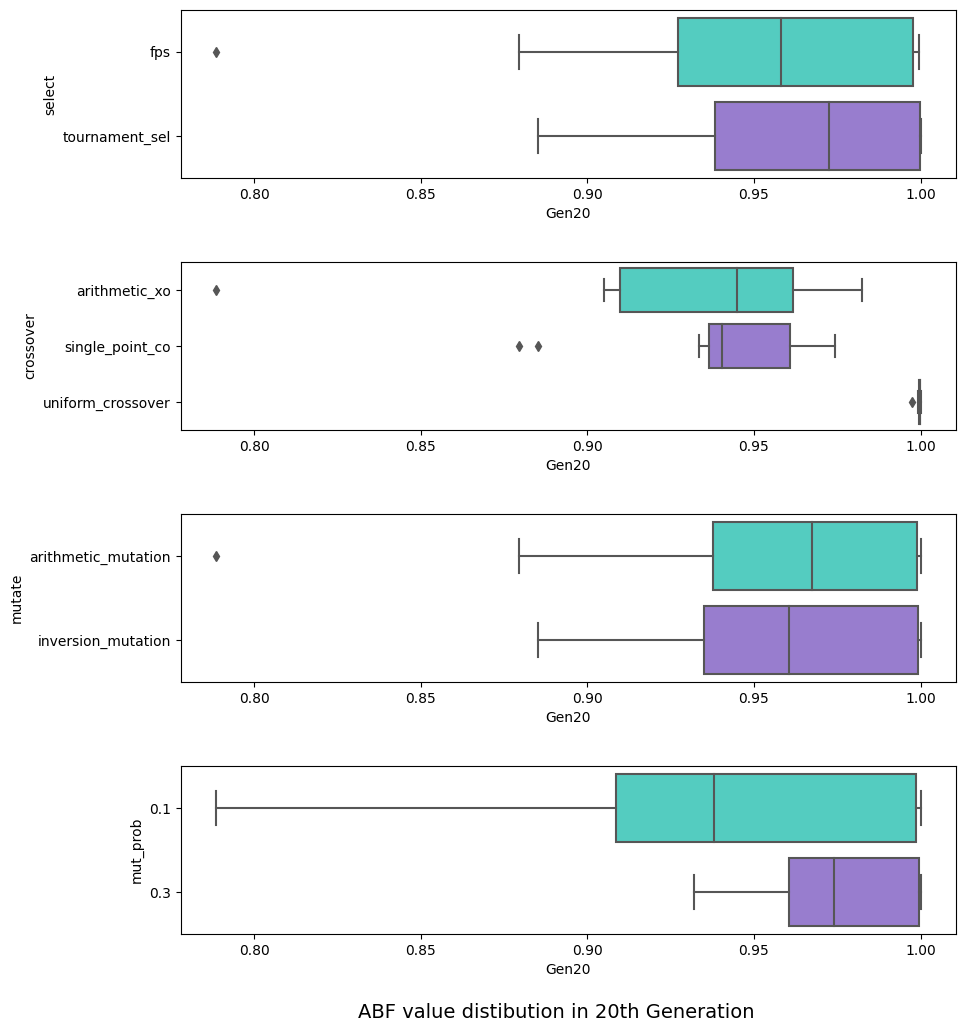

In [34]:
f, axes = plt.subplots(4, figsize = (10, 12))

# Define and set custom color palette
custom_palette = ["#40E0D0", "#9370DB", "#FF7F50"]
sns.set_palette(custom_palette)

sns.boxplot(x="Gen20", y="select", orient="h", data = merged_df, ax=axes[0])
sns.boxplot(x="Gen20", y="crossover", orient="h", data = merged_df, ax=axes[1])
sns.boxplot(x="Gen20", y="mutate", orient="h", data = merged_df, ax=axes[2])
sns.boxplot(x="Gen20", y="mut_prob", orient="h", data = merged_df, ax=axes[3])

plt.subplots_adjust(hspace=0.5) # adjusting subplot spacing
f.text(0.5, 0.04, "ABF value distibution in 20th Generation", ha="center", fontsize=14) # Set x-axis label for all subplots
plt.show() 